In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#">1st Part (Delete Null Values)</a>
            <ol>
                <li><a href="#">1st Model - Algorithm 1</a></li>
                <li><a href="#">2nd Model - Algorithm 2</a></li>
                <li><a href="#">3rd Model - Algorithm 3</a></li>
            </ol>
        </li>
        <li><a href="#">2nd Part (Replace Null Values)</a>
            <ol>
                <li><a href="#">1st Model - Algorithm 1</a></li>
                <li><a href="#">2nd Model - Algorithm 2</a></li>
                <li><a href="#">3rd Model - Algorithm 3</a></li>
            </ol>
        </li>
    </ol>
</div>
<br>
<hr>


In [24]:
df = pd.read_csv(r'C:\Users\oo\Desktop\Coding\PROST Hackathon\Copy of marketing_campaign.csv', sep='\t', index_col=0)

In [25]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


<h2 id='cleandata'><b>Data Wrangling:</b></h2>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [6]:
# Handle missing values
df.isnull().sum()


Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

*Incomes are continues values, so to handle these null values, we'll just delete all rows having null income*

In [27]:
# Check if rows with null Income share common characteristics that could inform decisions.
df[df['Income'].isnull()]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,...,7,0,0,0,0,0,0,3,11,0
5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,...,1,0,0,0,0,0,0,3,11,0
7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,...,2,0,0,0,0,0,0,3,11,0
7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,...,6,0,0,0,0,0,0,3,11,0
8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,...,6,0,0,0,0,0,0,3,11,0
10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,...,8,0,0,0,0,0,0,3,11,0
8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,...,9,0,0,0,0,0,0,3,11,0
9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,...,7,0,0,0,0,0,0,3,11,0
5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,...,1,0,0,0,0,0,0,3,11,0


In [28]:
# remove rows with null incomes
df = df.dropna(subset=['Income'])
len(df)

2216

In [29]:
df['Income'].isnull().sum()  #return 0


np.int64(0)

## Type Casting

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   int

*Year of birth here is an object (string), we'll convert it to datetime, and the same for Dt_customer*

In [39]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 5524 to 9405
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2216 non-null   int64         
 1   Education            2216 non-null   object        
 2   Marital_Status       2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   MntWines             2216 non-null   int64         
 9   MntFruits            2216 non-null   int64         
 10  MntMeatProducts      2216 non-null   int64         
 11  MntFishProducts      2216 non-null   int64         
 12  MntSweetProducts     2216 non-null   int64         
 13  MntGoldProds         2216 non-null 

<h2 id='exploredata'><b>Data Exploration:</b></h2>

In [40]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Birth_Date
count,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216
mean,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,1968-10-27 00:27:56.534296032
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1893-01-01 00:00:00
25%,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1959-01-01 00:00:00
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1970-01-01 00:00:00
75%,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1977-01-01 00:00:00
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1996-01-01 00:00:00
std,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,NaN


### Detect & remove outliers:

In [45]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns].describe()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


No high differences between the mean and median <br>
No large standard deviations compared to the mean <br>
No extremely high max values relative to the 75th percentile <br>
So no outliers to remove

### Correlations:

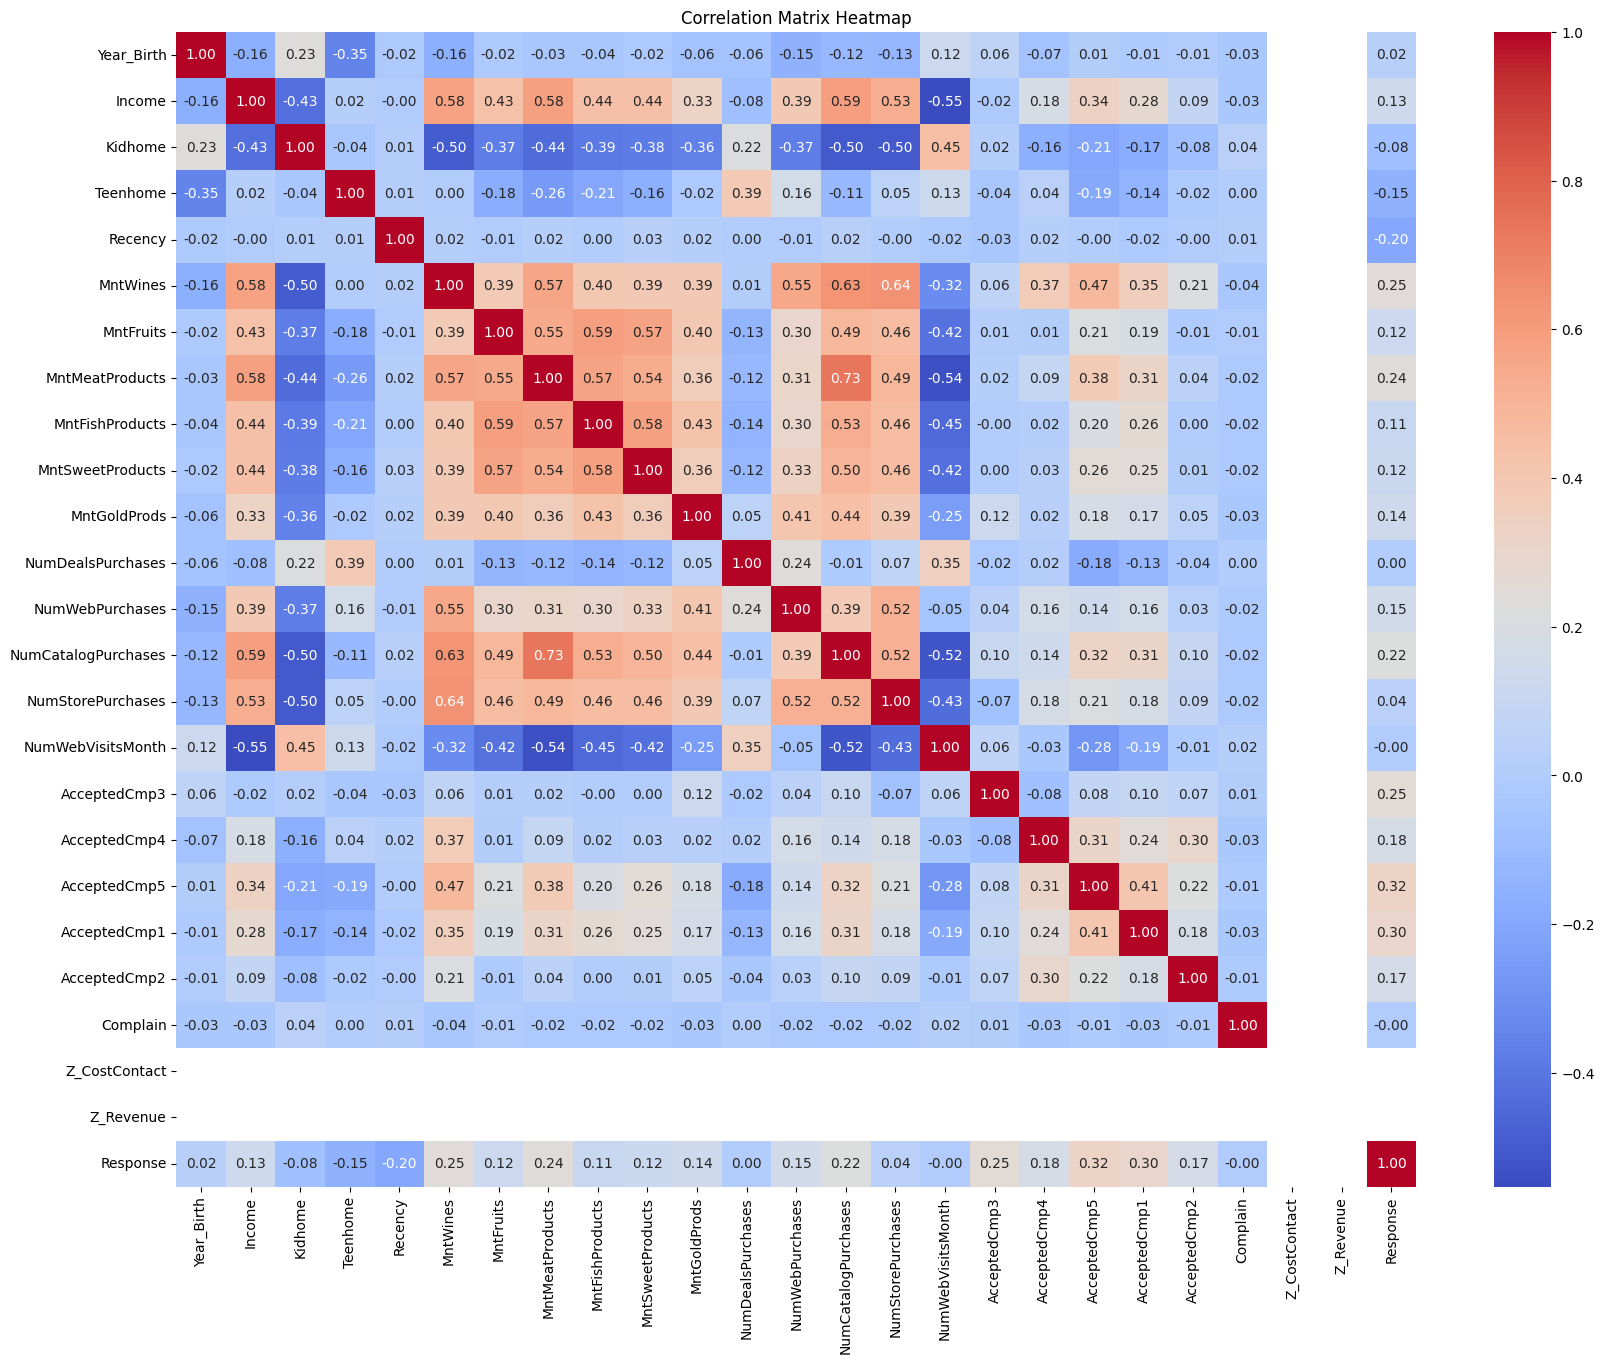

In [80]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

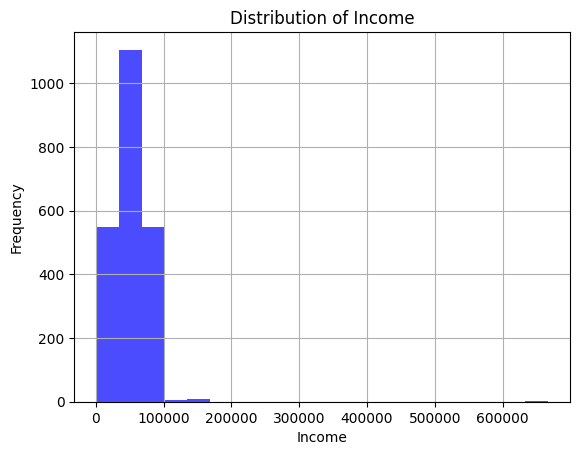

In [41]:
import matplotlib.pyplot as plt

#Distribution of Income

df['Income'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


C:\Users\oo\AppData\Local\Temp\ipykernel_30368\1090575517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='Set2')


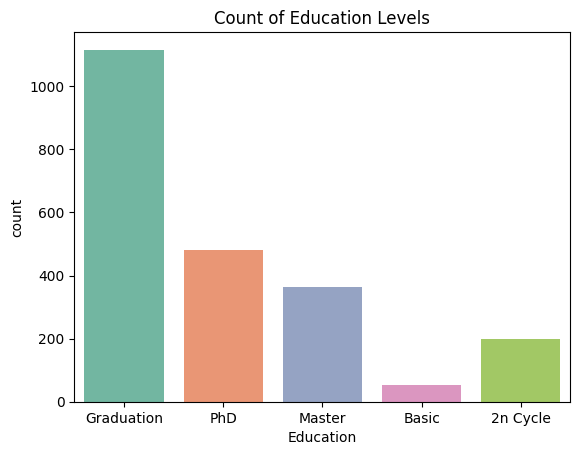

In [53]:
import seaborn as sns

#Count of Education Levels
sns.countplot(x='Education', data=df, palette='Set2')
plt.title('Count of Education Levels')
plt.show()


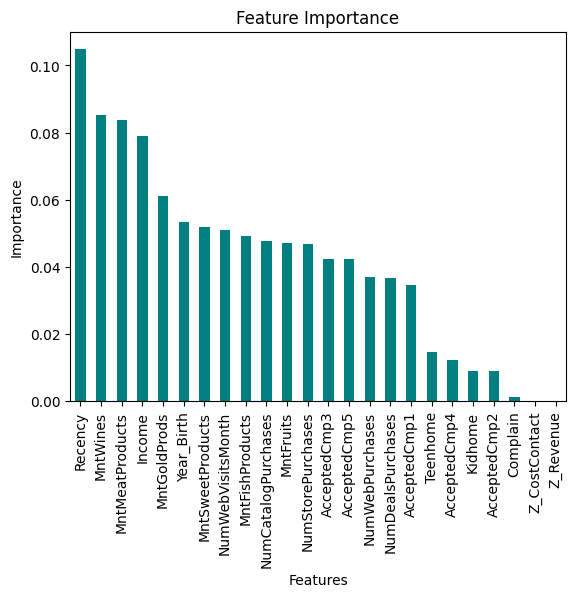

In [55]:
from sklearn.ensemble import RandomForestClassifier
# Filter numeric columns
numeric_df = df.select_dtypes(include='number')

# Separate features and target
X = numeric_df.drop(columns=['Response'])  # Drop target variable
y = numeric_df['Response']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, brier_score_loss

In [83]:
df.columns.to_list()

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Year_Birth_Date']

In [97]:
#Independent variables - Predictors
X = df[['Recency', 'MntWines', 'MntMeatProducts', 'Income', 'MntGoldProds', 'Kidhome', 'MntSweetProducts', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]  # Selected features
y = df['Response']  # Target variable,

## Train/Test dataset

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#visualize Shape of Train/Test datset
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (1772, 13) (1772,)
Test set:  (444, 13) (444,)


In [99]:
#choosing liblinear as solver
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, solver='liblinear')

In [100]:
#Evaluation
from sklearn.metrics import brier_score_loss

#Test predictions
yhat = LR.predict(X_test)
#Predict Proba
yhat_prob = LR.predict_proba(X_test)

#Evalution metrics

'''To evaluate the quality of these probabilities 
and themodel's calibration'''

brier_score = brier_score_loss(y_test, yhat_prob[:, 1])  # The probability of the positive class
print("Brier Score:", brier_score)

Brier Score: 0.11044884777356559


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score


#Evaluation Metrics:

accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
f1score = f1_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)

#Output

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("Jaccard Index:", jaccard)

Accuracy: 0.8468468468468469
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Jaccard Index: 0.0


C:\Users\oo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [101]:
# Train Random Forest Classifier
RF = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Test predictions
yhat = RF.predict(X_test)
# Predict Probabilities
yhat_prob = RF.predict_proba(X_test)

# Evaluation - Brier Score
brier_score = brier_score_loss(y_test, yhat_prob[:, 1])  # The probability of the positive class
print("Brier Score:", brier_score)

Brier Score: 0.09591581234391279


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, brier_score_loss
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

# Train Random Forest Classifier
RF = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Test predictions
yhat = RF.predict(X_test)
# Predict Probabilities
yhat_prob = RF.predict_proba(X_test)

# Evaluation - Brier Score
brier_score = brier_score_loss(y_test, yhat_prob[:, 1])  # The probability of the positive class
print("Brier Score:", brier_score)

# Evaluation Metrics
accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
f1score = f1_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)

# Output Evaluation Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("Jaccard Index:", jaccard)


Train set:  (1772, 13) (1772,)
Test set:  (444, 13) (444,)


Brier Score: 0.09591581234391279
Accuracy: 0.8783783783783784
Precision: 0.6842105263157895
Recall: 0.38235294117647056
F1 Score: 0.49056603773584906
Jaccard Index: 0.325


In [91]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, brier_score_loss
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

# Train Support Vector Machine Classifier
SVM = SVC(probability=True, random_state=42)  # probability=True to get predicted probabilities
SVM.fit(X_train, y_train)

# Test predictions
yhat = SVM.predict(X_test)
# Predict Probabilities
yhat_prob = SVM.predict_proba(X_test)

# Evaluation - Brier Score
brier_score = brier_score_loss(y_test, yhat_prob[:, 1])  # The probability of the positive class
print("Brier Score:", brier_score)

# Evaluation Metrics
accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
f1score = f1_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)

# Output Evaluation Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("Jaccard Index:", jaccard)


Train set:  (1772, 8) (1772,)
Test set:  (444, 8) (444,)
Brier Score: 0.12697272232011902
Accuracy: 0.8468468468468469
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Jaccard Index: 0.0


C:\Users\oo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, brier_score_loss
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

# Train K-Nearest Neighbors Classifier
KNN = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of n_neighbors
KNN.fit(X_train, y_train)

# Test predictions
yhat = KNN.predict(X_test)
# Predict Probabilities
yhat_prob = KNN.predict_proba(X_test)

# Evaluation - Brier Score
brier_score = brier_score_loss(y_test, yhat_prob[:, 1])  # The probability of the positive class
print("Brier Score:", brier_score)

# Evaluation Metrics
accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
f1score = f1_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)

# Output Evaluation Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("Jaccard Index:", jaccard)


Train set:  (1772, 8) (1772,)
Test set:  (444, 8) (444,)
Brier Score: 0.12279279279279282
Accuracy: 0.8400900900900901
Precision: 0.42857142857142855
Recall: 0.1323529411764706
F1 Score: 0.20224719101123595
Jaccard Index: 0.1125


In [96]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, brier_score_loss
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

# Train Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
GB.fit(X_train, y_train)

# Test predictions
yhat = GB.predict(X_test)
# Predict Probabilities
yhat_prob = GB.predict_proba(X_test)

# Evaluation - Brier Score
# brier_score = brier_score_loss(y_test, yhat_prob[:, 1])  # The probability of the positive class
# print("Brier Score:", brier_score)

# Evaluation Metrics
accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
f1score = f1_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)

# Output Evaluation Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("Jaccard Index:", jaccard)


Train set:  (1772, 8) (1772,)
Test set:  (444, 8) (444,)
Accuracy: 0.8648648648648649
Precision: 0.625
Recall: 0.29411764705882354
F1 Score: 0.4
Jaccard Index: 0.25
